In [46]:
import pandas as pd

#**1- Extracción del archivo tratado**

In [47]:
datos = pd.read_csv('datos_tratados.csv')
datos.head()

,id_cliente,cancelado,cliente_genero,cliente_mayor,cliente_con_pareja,cliente_con_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_multiples,internet_servicio,...,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_digital,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_totales,Cuentas_Diarias,cantidad_servicios
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.155059,3
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.967806,2
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.427727,1
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.219448,4
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.756242,2


In [48]:
datos.shape

(7032, 23)

In [49]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7032 non-null   object 
 1   cancelado                        7032 non-null   bool   
 2   cliente_genero                   7032 non-null   object 
 3   cliente_mayor                    7032 non-null   bool   
 4   cliente_con_pareja               7032 non-null   bool   
 5   cliente_con_dependientes         7032 non-null   bool   
 6   cliente_antiguedad               7032 non-null   int64  
 7   telefono_servicio                7032 non-null   bool   
 8   telefono_lineas_multiples        7032 non-null   object 
 9   internet_servicio                7032 non-null   object 
 10  internet_seguridad_en_linea      7032 non-null   object 
 11  internet_respaldo_en_linea       7032 non-null   object 
 12  internet_proteccion_

#**2- Eliminación de columnas irrelevantes**

In [50]:
datos = datos.drop(columns=['id_cliente'])
datos.head()

,cancelado,cliente_genero,cliente_mayor,cliente_con_pareja,cliente_con_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_multiples,internet_servicio,internet_seguridad_en_linea,...,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_digital,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_totales,Cuentas_Diarias,cantidad_servicios
0,False,Female,False,True,True,9,True,No,DSL,No,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.155059,3
1,False,Male,False,False,False,9,True,Yes,DSL,No,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.967806,2
2,True,Male,False,False,False,4,True,No,Fiber optic,No,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.427727,1
3,True,Male,True,True,False,13,True,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.219448,4
4,True,Female,True,True,False,3,True,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.756242,2


#**3- Análisis de correlación**

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

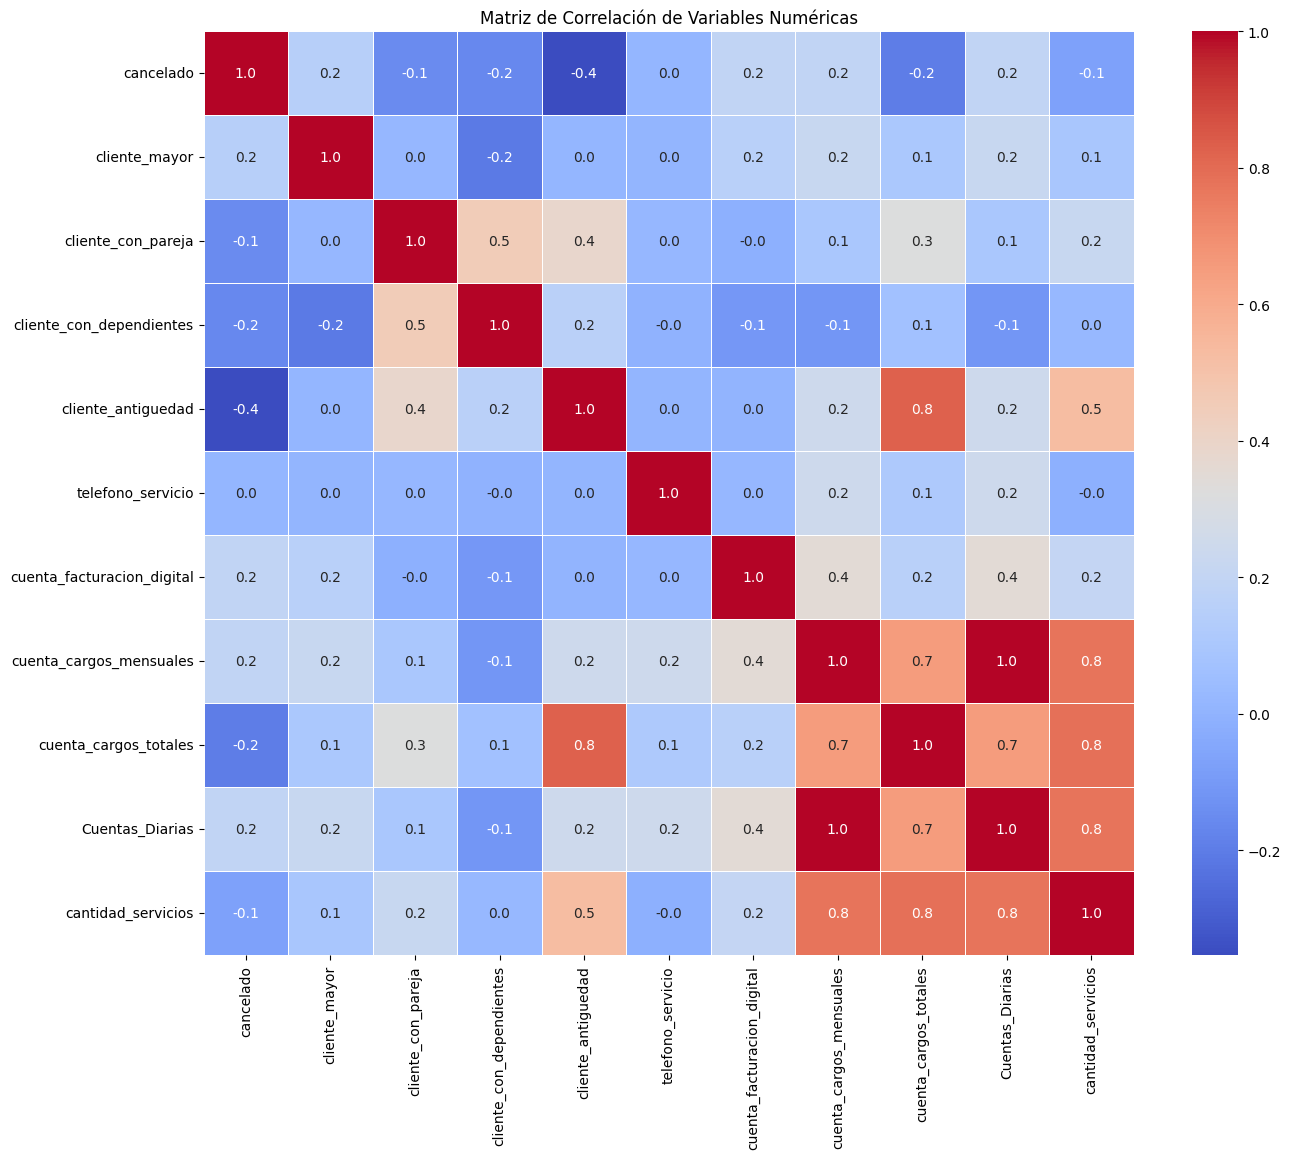

Correlación con la variable 'cancelado':
 cancelado                     1.000000
Cuentas_Diarias               0.192858
cuenta_cargos_mensuales       0.192858
cuenta_facturacion_digital    0.191454
cliente_mayor                 0.150541
telefono_servicio             0.011691
cantidad_servicios           -0.069701
cliente_con_pareja           -0.149982
cliente_con_dependientes     -0.163128
cuenta_cargos_totales        -0.199484
cliente_antiguedad           -0.354049
Name: cancelado, dtype: float64


In [52]:
columnas_numericas = datos.select_dtypes(include=['int64', 'float64', 'bool']).columns
datos_numerico = datos[columnas_numericas]

matriz_correlacion = datos_numerico.corr()


plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

correlacion_con_cancelado = matriz_correlacion['cancelado'].sort_values(ascending=False)
print("Correlación con la variable 'cancelado':\n", correlacion_con_cancelado)

Observaciones:
- Servicio de fibra óptica (0.31): los clientes con fibra óptica tienen la correlación positiva más fuerte. Los clientes con servicio de fibra óptica tienen una tendencia mayor a cancelar el servicio
- Método de pago (0.30): los clientes que pagan con cheque electrónico muestran una correlación considerable con la cancelación.
- Cargos mensuales (0.19): hay una correlación moderada entre los cargos mensuales y la cancelación.
- Antigüedad del cliente (-0.35): es la correlación más fuerte de todas. A mayor antigüedad del cliente, menor es la probabilidad de que cancele.
Contrato de dos años (-0.30): los clientes con contratos a largo plazo (dos años) son menos propensos a cancelar.
- Servicios adicionales: la mayoría de los servicios adicionales, como el soporte técnico, la seguridad en línea o el respaldo en línea, tienen una correlación negativa moderada. Esto sugiere que los clientes que tienen estos servicios adicionales son menos propensos a cancelar.

#**4- Análisis dirigido**

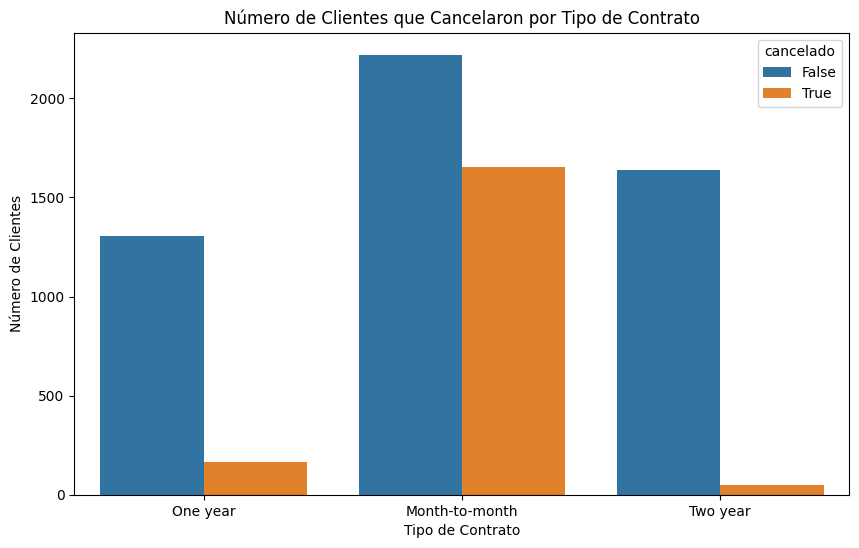

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cuenta_contrato', hue='cancelado', data=datos)
plt.title('Número de Clientes que Cancelaron por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

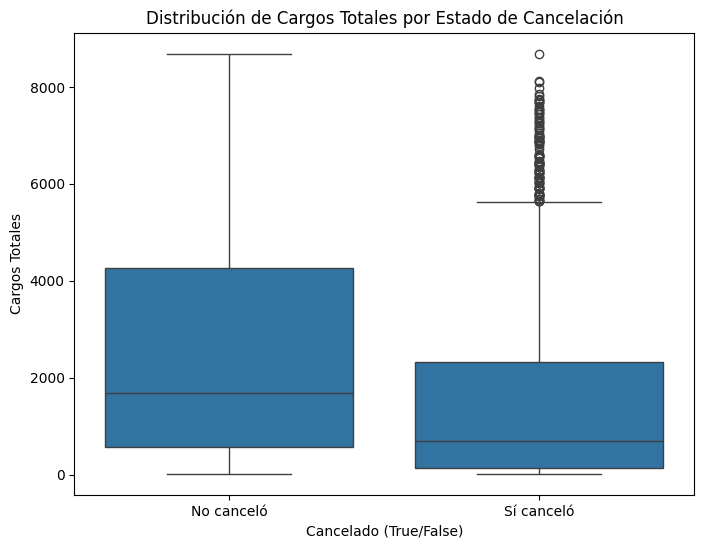

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelado', y='cuenta_cargos_totales', data=datos)
plt.title('Distribución de Cargos Totales por Estado de Cancelación')
plt.xlabel('Cancelado (True/False)')
plt.ylabel('Cargos Totales')
plt.xticks([0, 1], ['No canceló', 'Sí canceló'])
plt.show()

#**5- Encoding**

In [55]:
columnas_categoricas = datos.select_dtypes(include=['object']).columns
datos = pd.get_dummies(datos, columns=columnas_categoricas, drop_first=True)
datos.head()

,cancelado,cliente_mayor,cliente_con_pareja,cliente_con_dependientes,cliente_antiguedad,telefono_servicio,cuenta_facturacion_digital,cuenta_cargos_mensuales,cuenta_cargos_totales,Cuentas_Diarias,...,internet_soporte_tecnico_Yes,internet_streaming_tv_No internet service,internet_streaming_tv_Yes,internet_streaming_peliculas_No internet service,internet_streaming_peliculas_Yes,cuenta_contrato_One year,cuenta_contrato_Two year,cuenta_metodo_pago_Credit card (automatic),cuenta_metodo_pago_Electronic check,cuenta_metodo_pago_Mailed check
0,False,False,True,True,9,True,True,65.6,593.30,2.155059,...,True,False,True,False,False,True,False,False,False,True
1,False,False,False,False,9,True,False,59.9,542.40,1.967806,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,4,True,True,73.9,280.85,2.427727,...,False,False,False,False,False,False,False,False,True,False
3,True,True,True,False,13,True,True,98.0,1237.85,3.219448,...,False,False,True,False,True,False,False,False,True,False
4,True,True,True,False,3,True,True,83.9,267.40,2.756242,...,True,False,True,False,False,False,False,False,False,True


#**6- Verificación de la proporción de cancelación**

In [56]:
conteo = datos['cancelado'].value_counts()
proporcion = datos['cancelado'].value_counts(normalize=True) * 100

print("Recuento de clientes:")
print(conteo)
print("\nProporción de clientes (en %):")
print(proporcion)

Recuento de clientes:
cancelado
False    5163
True     1869
Name: count, dtype: int64

Proporción de clientes (en %):
cancelado
False    73.421502
True     26.578498
Name: proportion, dtype: float64


Oservaciones:
- Existe un desbalance de las clases de la variable "cancelado": el 73,42% de los clientes no canceló,  y el 26,58% de los clientes sí canceló.
- En un conjunto de datos desbalanceado, un modelo predictivo podría aprender a predecir siempre la clase mayoritaria. Por ejemplo, un modelo que siempre predice que un cliente "no cancelará" ya tendría una precisión del 73.4%, lo que parece un buen resultado pero es completamente inútil para el objetivo de identificar a los clientes que realmente cancelan.
- En cuanto a las métricas para evaluar el modelo, la precisión (accuracy) se vuelve una métrica engañosa. Aunque el modelo tenga una precisión alta, su capacidad para identificar correctamente los casos de la clase minoritaria ("cancelados") podría ser terrible. Un análisis correcto, debes usar métricas que evalúen el desempeño en ambas clases, como:
 - Recall (Sensibilidad): mide la capacidad del modelo para encontrar todos los casos positivos reales (todos los clientes que cancelaron).
 - Precision (Precisión): mide la capacidad del modelo para que, cuando predice un caso positivo, sea realmente un caso positivo.
 - F1-Score: es un promedio entre precision y recall.
 - Curva AUC-ROC: Es una métrica que evalúa el rendimiento del modelo en todas las tasas de error.
- Para mitigar los efectos del desbalance, existen varias técnicas comunes que puedes aplicar:
 - Técnicas de remuestreo (Resampling):
 - 1- Oversampling (Sobremuestreo): consiste en aumentar la cantidad de muestras de la clase minoritaria. Un método muy popular es SMOTE (Synthetic Minority Over-sampling Technique), que genera nuevas muestras sintéticas de la clase minoritaria en lugar de solo duplicar las existentes.
 - 2- Undersampling (Submuestreo): consiste en reducir la cantidad de muestras de la clase mayoritaria. Se eliminan aleatoriamente algunos registros para equilibrar las clases. Sin embargo, esto puede llevar a la pérdida de información valiosa.
 - Usar algoritmos adecuados: algunos algoritmos de machine learning, como los modelos de árbol de decisión o los métodos de boosting (como XGBoost), manejan mejor el desbalance de clases que otros. También puedes ajustar sus hiperparámetros para que el algoritmo le dé más peso a la clase minoritaria.

#**7- Separación de datos y Balanceo de clases (oversampling/SMOTE)**

In [57]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [58]:
X = datos.drop(columns=['cancelado'])
y = datos['cancelado']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Distribución original de la clase: {Counter(y_entrenamiento)}")

smote = SMOTE(random_state=42)
X_entrenamiento_resampleado, y_entrenamiento_resampleado = smote.fit_resample(X_entrenamiento, y_entrenamiento)

print(f"Distribución resampleada de la clase: {Counter(y_entrenamiento_resampleado)}")

Distribución original de la clase: Counter({False: 3609, True: 1313})
Distribución resampleada de la clase: Counter({False: 3609, True: 3609})


#**8- Creación de modelos**

##**8.1- Árbol de decisión**

In [59]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_entrenamiento_resampleado, y_entrenamiento_resampleado)

DecisionTreeClassifier(random_state=42)

##**8.2- Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(n_estimators=100, random_state=42)
bosque.fit(X_entrenamiento_resampleado, y_entrenamiento_resampleado)

RandomForestClassifier(random_state=42)

#**9- Evaluación de los modelos**

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

##**9.1- Árbol de decisión**

### Evaluación del Árbol de Decisión ###

Exactitud (Accuracy): 0.7227

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.83      0.78      0.81      1554
        True       0.48      0.55      0.51       556

    accuracy                           0.72      2110
   macro avg       0.65      0.67      0.66      2110
weighted avg       0.74      0.72      0.73      2110

Matriz de Confusión:
[[1218  336]
 [ 249  307]]


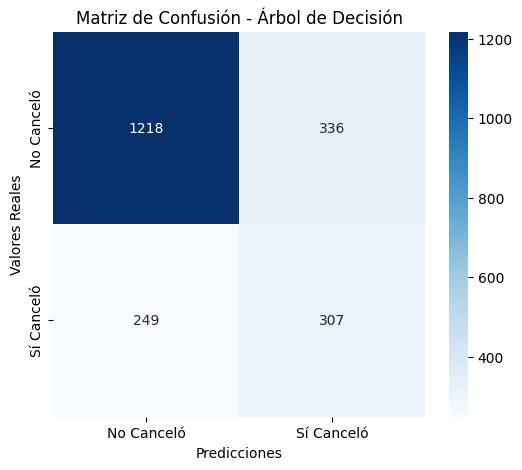

In [63]:
y_pred_arbol = arbol.predict(X_prueba)


print("### Evaluación del Árbol de Decisión ###\n")

acuracia_arbol = accuracy_score(y_prueba, y_pred_arbol)
print(f"Exactitud (Accuracy): {acuracia_arbol:.4f}\n")

print("Reporte de Clasificación:")
print(classification_report(y_prueba, y_pred_arbol))

cm_arbol = confusion_matrix(y_prueba, y_pred_arbol)
print("Matriz de Confusión:")
print(cm_arbol)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='Blues', xticklabels=['No Canceló', 'Sí Canceló'], yticklabels=['No Canceló', 'Sí Canceló'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

##**9.1- Random forest**



### Evaluación del Random Forest ###

Exactitud (Accuracy): 0.7749

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1554
        True       0.57      0.60      0.58       556

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.78      0.77      0.78      2110

Matriz de Confusión:
[[1302  252]
 [ 223  333]]


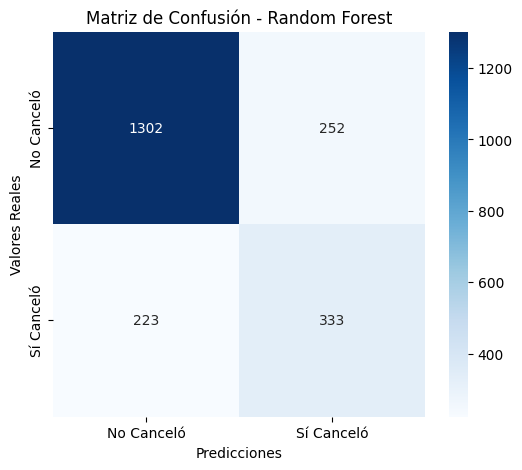

In [65]:
y_pred_bosque = bosque.predict(X_prueba)

print("\n\n### Evaluación del Random Forest ###\n")

acuracia_bosque = accuracy_score(y_prueba, y_pred_bosque)
print(f"Exactitud (Accuracy): {acuracia_bosque:.4f}\n")

print("Reporte de Clasificación:")
print(classification_report(y_prueba, y_pred_bosque))

cm_bosque = confusion_matrix(y_prueba, y_pred_bosque)
print("Matriz de Confusión:")
print(cm_bosque)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_bosque, annot=True, fmt='d', cmap='Blues', xticklabels=['No Canceló', 'Sí Canceló'], yticklabels=['No Canceló', 'Sí Canceló'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

Observaciones:
- El modelo de Random Forest tuvo un mejor desempeño que el Árbol de Decisión en todas las métricas clave.
- Análisis detallado:
 - Exactitud (Accuracy): El Random Forest (77.49%) superó la exactitud del Árbol de Decisión (72.27%).
 - F1-score: la métrica más importante en este caso, el F1-score para la clase minoritaria (True), fue de 0.58 para el Random Forest y de 0.51 para el Árbol de Decisión. Esto indica que el Random Forest es significativamente mejor para identificar correctamente a los clientes que cancelan.
 - Precisión y Recall: el Random Forest también tuvo una mejor precisión (0.57 vs 0.48) y un mejor recall (0.60 vs 0.55) para la clase minoritaria. Esto significa que cuando el modelo predice una cancelación, es más probable que sea correcta (precisión) y es mejor para encontrar a todos los clientes que realmente cancelaron (recall).

#**10- Análisis de importancia de las variables**

In [66]:
import pandas as pd

### Top 10 variables más importantes - Árbol de Decisión ###
                                      Variable  Importancia
30         cuenta_metodo_pago_Electronic check     0.226954
3                           cliente_antiguedad     0.162042
7                        cuenta_cargos_totales     0.139022
8                              Cuentas_Diarias     0.068177
13               internet_servicio_Fiber optic     0.057133
6                      cuenta_cargos_mensuales     0.054541
5                   cuenta_facturacion_digital     0.040256
9                           cantidad_servicios     0.024050
10                         cliente_genero_Male     0.022315
29  cuenta_metodo_pago_Credit card (automatic)     0.018224

### Top 10 variables más importantes - Random Forest ###
                               Variable  Importancia
3                    cliente_antiguedad     0.136074
7                 cuenta_cargos_totales     0.135079
6               cuenta_cargos_mensuales     0.092644
30  cuent

/tmp/ipython-input-1596150447.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Importancia', y='Variable', data=df_importancia_arbol.head(10), palette='viridis')
/tmp/ipython-input-1596150447.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Importancia', y='Variable', data=df_importancia_bosque.head(10), palette='plasma')


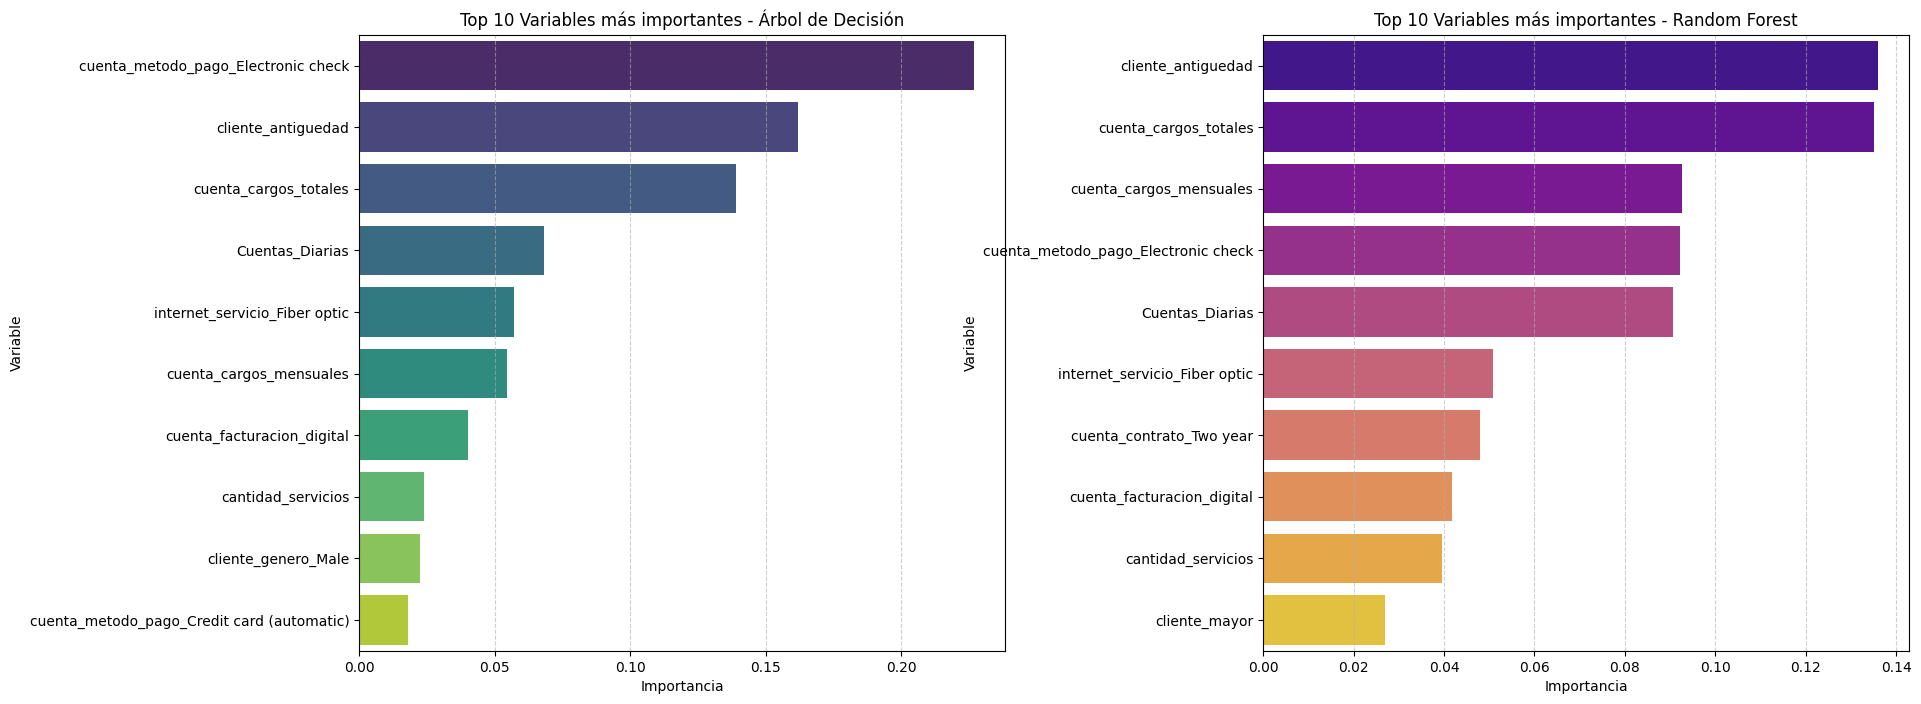

In [69]:
nombres_caracteristicas = X_entrenamiento_resampleado.columns

importancia_arbol = arbol.feature_importances_
df_importancia_arbol = pd.DataFrame({'Variable': nombres_caracteristicas, 'Importancia': importancia_arbol})
df_importancia_arbol = df_importancia_arbol.sort_values(by='Importancia', ascending=False)

importancia_bosque = bosque.feature_importances_
df_importancia_bosque = pd.DataFrame({'Variable': nombres_caracteristicas, 'Importancia': importancia_bosque})
df_importancia_bosque = df_importancia_bosque.sort_values(by='Importancia', ascending=False)

print("### Top 10 variables más importantes - Árbol de Decisión ###")
print(df_importancia_arbol.head(10))
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.4)

print("\n### Top 10 variables más importantes - Random Forest ###")
print(df_importancia_bosque.head(10))

sns.barplot(ax=axes[0], x='Importancia', y='Variable', data=df_importancia_arbol.head(10), palette='viridis')
axes[0].set_title('Top 10 Variables más importantes - Árbol de Decisión')
axes[0].set_xlabel('Importancia')
axes[0].set_ylabel('Variable')
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

sns.barplot(ax=axes[1], x='Importancia', y='Variable', data=df_importancia_bosque.head(10), palette='plasma')
axes[1].set_title('Top 10 Variables más importantes - Random Forest')
axes[1].set_xlabel('Importancia')
axes[1].set_ylabel('Variable')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

#**CONCLUSIÓN**

El presente informe detalla los resultados del análisis predictivo enfocado en la cancelación de clientes. Se evaluaron dos modelos de Machine Learning: Árbol de Decisión y Random Forest.

El modelo de Random Forest demostró un desempeño superior, identificando con mayor precisión los factores que conducen a la cancelación. Los hallazgos principales revelan que la antigüedad del cliente y el tipo de contrato son los factores más determinantes. Se proponen estrategias de retención basadas en la identificación de grupos de clientes de alto riesgo.

**Metodología**

El análisis se llevó a cabo en varias etapas:

- Análisis Exploratorio: se calculó la matriz de correlación entre las variables numéricas y la cancelación para identificar las relaciones iniciales.

- Preprocesamiento: se aplicó el método SMOTE (Synthetic Minority Over-sampling Technique) sobre los datos de entrenamiento para balancear la clase minoritaria ("cancelado"), lo que asegura que los modelos no se sesguen.

- Modelado: se entrenaron dos modelos de clasificación: un Árbol de Decisión y un Random Forest.

- Evaluación: se comparó el rendimiento de ambos modelos utilizando métricas clave como la exactitud, la precisión, el recall, el F1-score y la matriz de confusión.

- Análisis de importancia de variables: se identificaron las variables más influyentes en las predicciones del modelo.

**Análisis y resultados clave**

- Rendimiento del modelo: el modelo de Random Forest superó consistentemente al Árbol de Decisión. Su F1-score de 0.58 para la clase de "cancelación" demuestra una mejor capacidad para equilibrar la precisión y la exhaustividad en la identificación de clientes en riesgo, en comparación con el 0.51 del Árbol de Decisión. Este resultado confirma que el Random Forest es una opción más confiable para este problema.

- Factores Clave que influyen en la cancelación: el análisis de la importancia de las variables reveló los siguientes factores como los más influyentes en la predicción de la cancelación:
 - Antigüedad del cliente (cliente_antiguedad): es el factor más importante. Los modelos confirman que cuanto más tiempo un cliente ha estado con la compañía, menos probable es que cancele el servicio.
 - Cargos totales (cuenta_cargos_totales): esta variable es altamente significativa, lo que refuerza la conclusión anterior. Los clientes con un historial de gasto elevado son más propensos a ser leales.
 - Método de pago (cuenta_metodo_pago_Electronic check): los clientes que pagan con cheque electrónico tienen un riesgo significativamente mayor de cancelar. Esta es una variable crítica para segmentar a los clientes.
 - Tipo de contrato (cuenta_contrato_Two year): los clientes con contratos de dos años tienen una fuerte correlación negativa con la cancelación, lo que indica que es un factor de retención muy poderoso.
 - Servicio de Internet (internet_servicio_Fiber optic): los clientes con servicio de fibra óptica son un segmento de alto riesgo para la cancelación, lo que sugiere posibles problemas de satisfacción o precio en este tipo de servicio.
 - Cargos mensuales (cuenta_cargos_mensuales): el costo del servicio es un factor importante, lo que sugiere que los aumentos de tarifas o un precio percibido como alto pueden ser un catalizador para la cancelación.

**Estrategias de retención propuestas**

Se proponen las siguientes estrategias para mitigar la cancelación de clientes:
- Fomentar la lealtad y la permanencia:
 - Ofrecer incentivos a la fidelidad a los clientes a medida que su antigüedad aumenta.
 - Implementar programas de reconocimiento para clientes de largo plazo.

- Optimizar las ofertas de contrato:
 - Promover los contratos a dos años mediante descuentos o beneficios exclusivos, ya que es la variable con mayor poder predictivo para retener clientes.
 - Aumentar los esfuerzos de retención cuando los contratos mensuales se acercan al período en el que la mayoría de los clientes cancelan.

- Monitorear y mejorar segmentos de alto riesgo:
 - Identificar a los clientes que usan el cheque electrónico y aquellos con servicio de fibra óptica para ofrecerles una atención al cliente proactiva y personalizada.
 - Realizar encuestas de satisfacción o contactar a estos segmentos para entender sus preocupaciones antes de que decidan cancelar.

- Gestión de costos y servicios:
 - Analizar la competitividad de los precios, especialmente para los clientes con cargos mensuales elevados, para asegurar que el valor percibido justifique el costo.